# Compulsory task with the titanic data

Perform in-depth EDA on the dataset and answer the following questions:
-   What is the most important factor in determing survival of the Titanic incident?
-   In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
-   "Women and children first." Was this the case?
-   Add one other observation that you have noted in the dataset

In [2]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt


In [11]:
#Loading the data as a pandas df
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.shape

(891, 12)

The data consists of 891 instances or features (rows) and 11 columns. Now checkout for missing values, and count them

In [13]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:11]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

Age and Cabin has missing values. These show to have NaN

<Axes: >

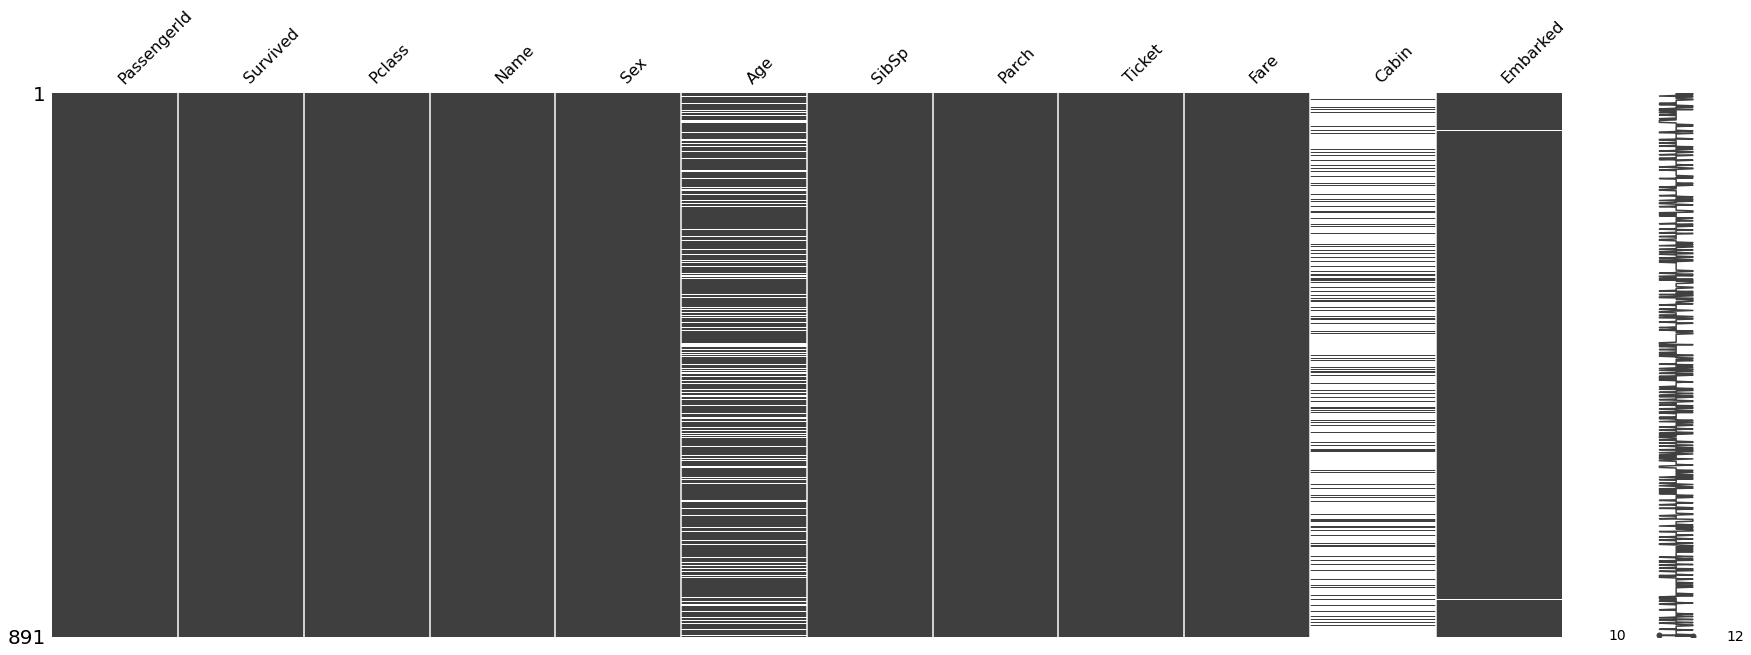

In [14]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

In [15]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

8.099513655069211

Seems like 8.099% of the values are missing

##Filling in missing values automatically
Use Panda's fillna() function to fill in missing values in a dataframe.i.e fill NaN with 0.

In [16]:
# Create a temporary dataset
temp_df = df

# replace all NA's with 0
temp_df.fillna(0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df_survived = df.groupby(by = "Survived").count()
df_survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [19]:
positive = df.Survived[df['Survived'] == 1].count()
negative = df.Survived[df['Survived'] == 0].count()
print( 'Survived =' , positive,'not_survived = ', negative)

Survived = 342 not_survived =  549


/home/conmec/miniconda3/envs/wind-floris/lib/python3.11/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


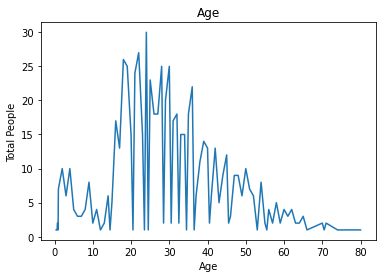

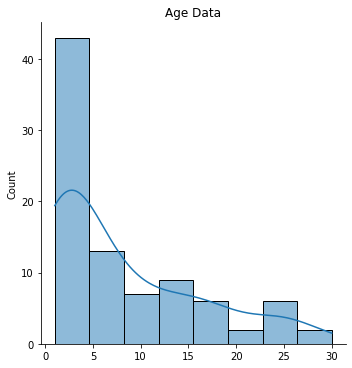

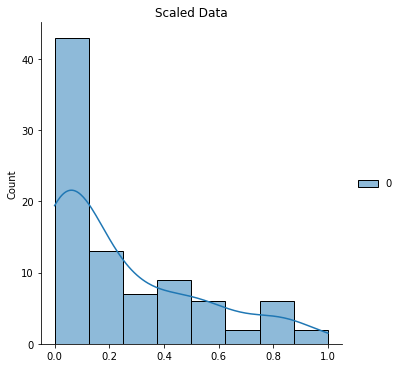

In [23]:
sort_by_age = df.groupby('Age').size()

plot_month = sort_by_age.plot(title = 'Age')
plot_month.set_xlabel('Age')
plot_month.set_ylabel('Total People')

# generate 1000 data points randomly drawn from an exponential distribution
scaled_data = minmax_scaling(sort_by_age, columns = [0])

# plot both t590+25+ogether to compare
#fig, ax = plt.subplots(1,2)
ax1 = sns.displot(sort_by_age, kde=True).set(title= "Age Data")
ax2 = sns.displot(scaled_data, kde=True).set(title= "Scaled Data")

In [60]:
df_bin = df      # for discretised continuous variables
df_con = df      # for continuous variables

male      577
female    314
Name: Sex, dtype: int64


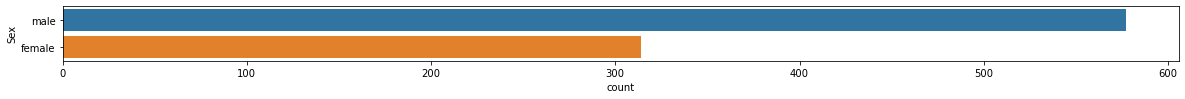

In [61]:
# How many clients are Male and Female
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=df_bin);
print(df_bin.Sex.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


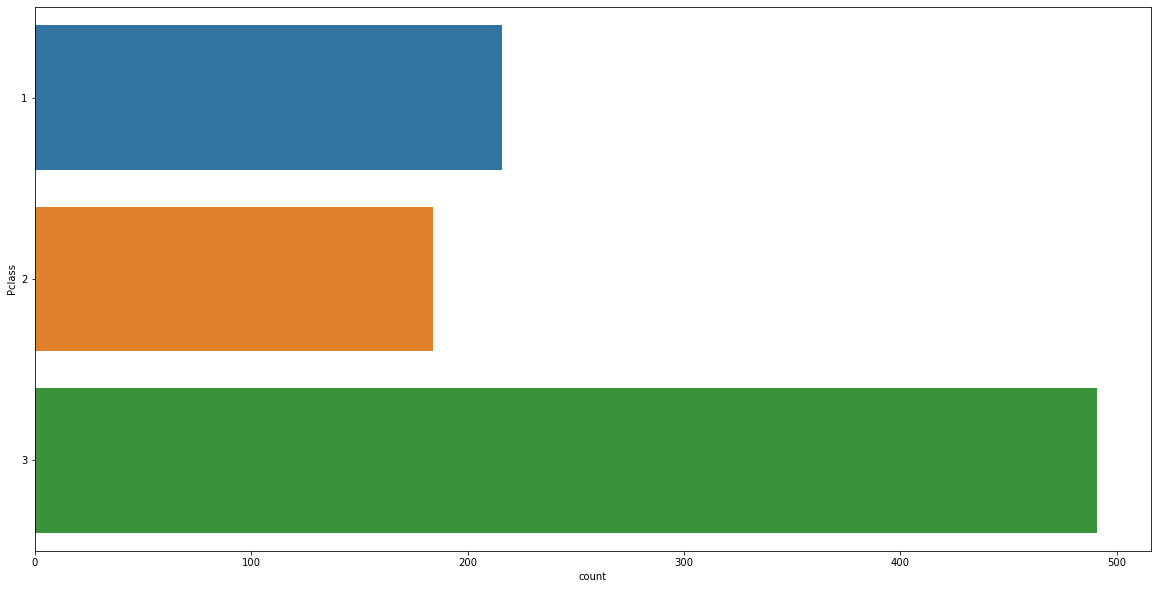

In [63]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_bin['Pclass'], data=df_bin);
print(df_bin.Pclass.value_counts())

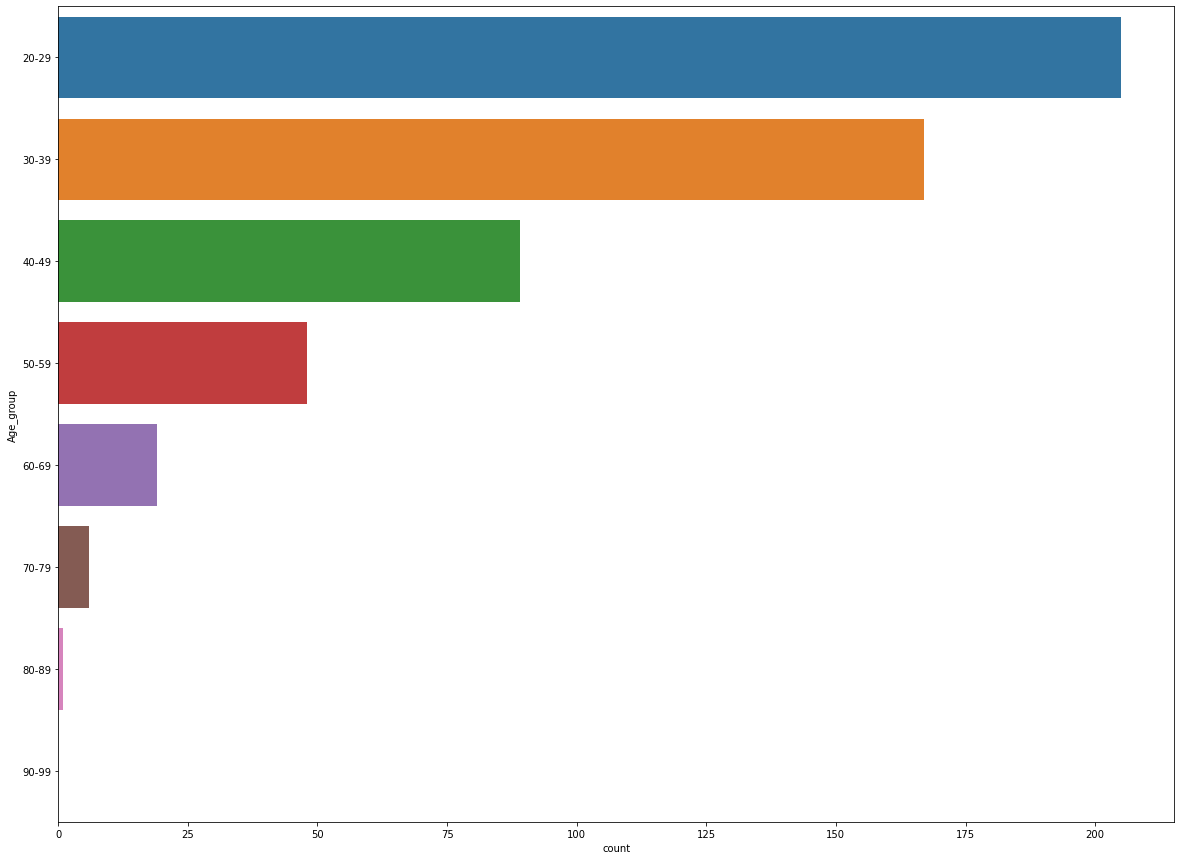

In [67]:
df_bin['Age_group'] = pd.cut(df_bin['Age'], [20, 29, 39,49, 59,69,79,89,99], 
                   labels=['20-29', '30-39', '40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,15))
sns.countplot(y=df_bin['Age_group'], data=df_bin);

In [8]:
from matplotlib import pyplot as pyplot
import seaborn as sns

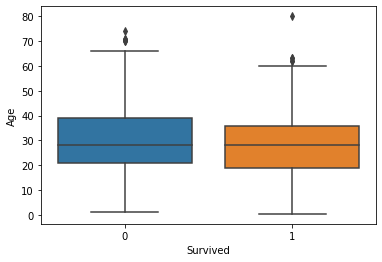

In [10]:
ax = sns.boxplot(data = df, x = 'Survived', y = 'Age')

The chart shows that the ones survived are within the age range of less than 60 year old.

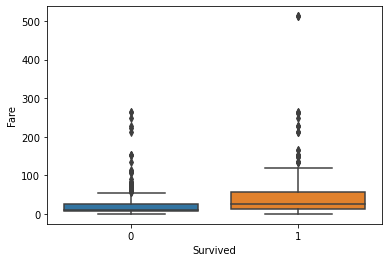

In [54]:
ax = sns.boxplot(data = df, x = 'Survived', y = 'Fare')